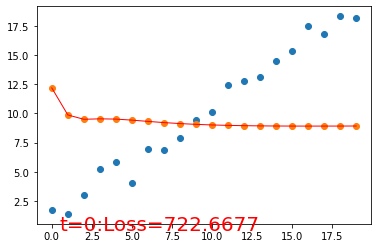

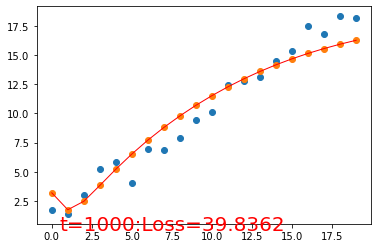

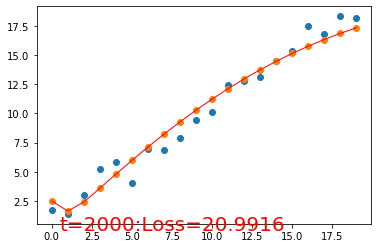

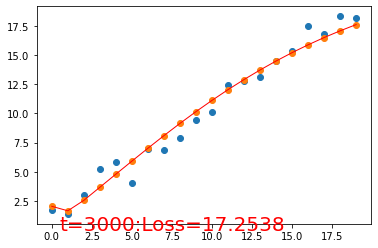

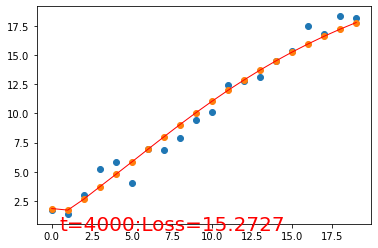

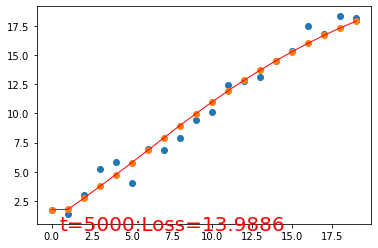

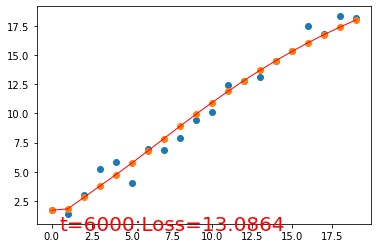

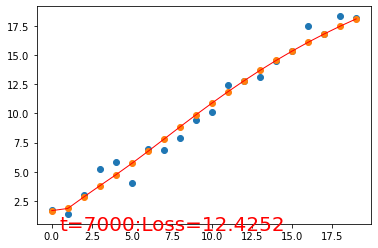

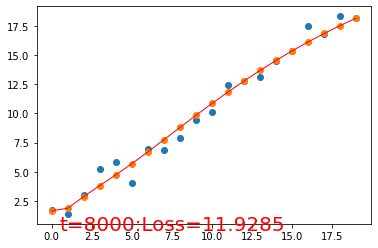

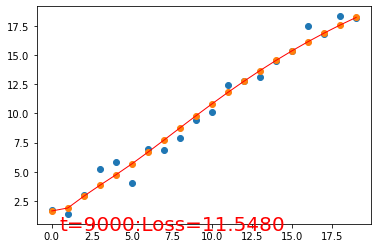

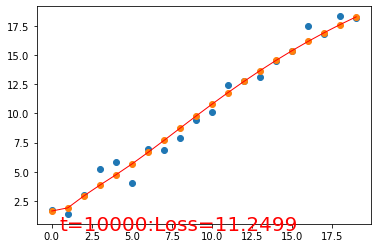

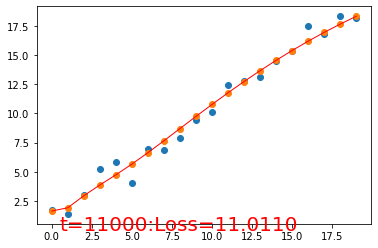

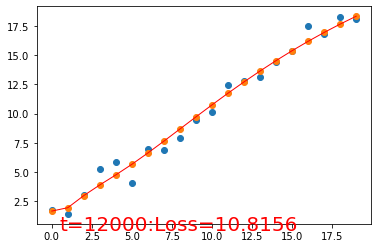

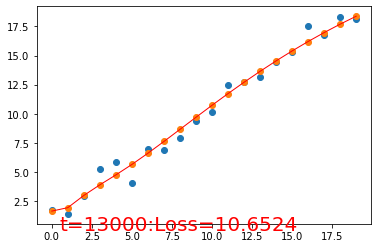

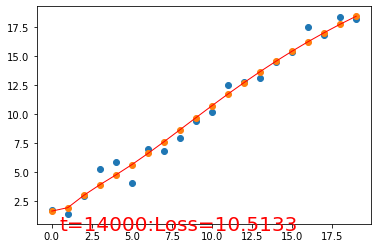

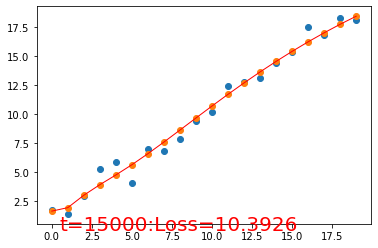

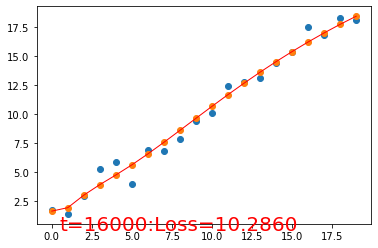

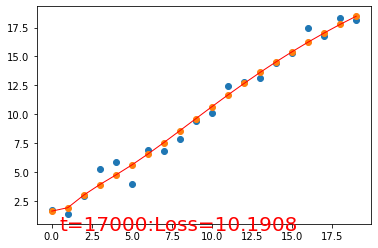

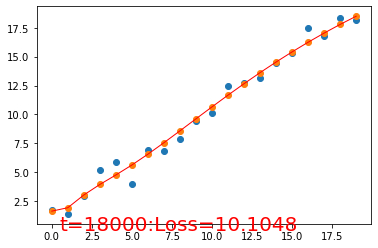

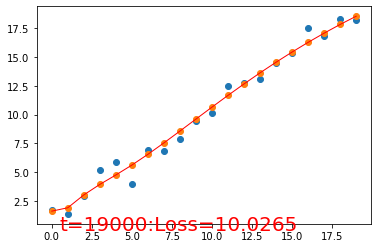

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid_derivative(s):
    ds = s * (1 - s)
    return ds
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension. 
N, D_in, H, D_out = 20, 1, 64, 1
# Create random input and output data
np.random.seed(0)
x = np.arange(0,N,1).reshape(N,D_in)*1.0 #20*1
#print(x)
y = x + np.random.randn(N,D_out) #20*1
#print(y)
# Randomly initialize weights
w1 = np.random.randn(D_in, H) #1*64
w2 = np.random.randn(H, D_out) #64*1
learning_rate = 1e-4

for t in range(20000):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    # print(h.shape)
    h_relu = sigmoid(h)
    y_pred = h_relu.dot(w2)
    # Compute loss
    loss = np.square(y_pred - y).sum()
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h = grad_y_pred.dot(w2.T) #[N, H]=[N, 1]*[1, H]
    grad_h = grad_h*sigmoid_derivative(h_relu) #[N, H]=[N, H] . [N, H]]
    grad_w1 = x.T.dot(grad_h) #[1, H]=[1, N]*{N, H}
    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    if (t%1000==0):
        plt.cla()
        plt.scatter(x,y)
        plt.scatter(x,y_pred)
        plt.plot(x,y_pred,'r-',lw=1, label="plot figure")
        plt.text(0.5, 0, 't=%d:Loss=%.4f' % (t, loss), fontdict={'size': 20, 'color': 'red'})
        plt.show()